In [2]:
import scipy.io.arff as io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13

# Read arff data
with open("Genes_Atividade_IA.arff") as f:
    values = io.loadarff(f)
    f.close()
    
dataset = pd.DataFrame(data=values[0])
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 20].values

In [3]:
print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 50
#pd.options.display.max_rows =  
dataset.describe()

20 60


,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.040157,41.486336,51.338392,52.555181,48.932735,53.852077,45.797667,40.663197,39.632611,52.066032,41.493874,53.691974,57.023709,21.915492,27.728612,35.790131,54.864549,54.294117,35.087462,52.105545,46.389605,42.376928,27.628763,22.053380,35.257338,43.396844,52.185982,56.164531,37.587312,44.472439,72.736881,46.143284
std,195.264717,181.466441,210.726346,252.295704,221.732356,393.758129,123.183344,157.028175,185.991398,186.169270,139.247221,261.725555,314.203534,116.726607,136.411996,336.523288,277.654367,277.993904,1108.114405,242.242244,241.613858,165.470468,308.543568,208.651352,95.223057,193.638153,233.848790,347.561819,207.009834,114.878046,742.846516,222.768691
min,0.000003,0.000003,0.000004,0.000004,0.000004,0.000003,0.000004,0.000003,0.000003,0.000004,0.000004,0.000004,0.000004,0.000002,0.000002,0.000003,0.000004,0.000004,0.000002,0.000004,0.000004,0.000003,0.000003,0.000002,0.000003,0.000003,0.000004,0.000004,0.000003,0.000003,0.000005,0.000003
25%,3.173068,3.105311,3.140023,7.117802,7.087438,1.257345,7.631545,3.071134,2.765053,7.428423,3.506638,7.896982,8.147757,1.569051,2.492157,1.170095,7.812597,3.751913,0.602562,4.128284,7.150531,3.094211,2.414023,0.427236,3.304699,5.983976,4.248427,3.678518,5.874027,6.997996,4.580134,3.174720
50%,12.692271,15.526556,19.625143,21.353406,21.262314,9.430086,19.078863,15.355670,13.825265,21.224067,14.026553,23.690945,20.369393,6.724503,9.968628,5.850474,23.437791,18.759564,2.008539,20.641418,17.876327,15.471057,8.046744,2.136179,16.523495,14.959941,21.242137,22.071107,14.685068,20.993988,22.900670,15.873599
75%,31.730678,34.158423,43.175314,46.265713,42.524627,34.576981,41.973499,33.782474,30.415583,50.937760,35.066382,47.381890,48.886544,15.690507,24.921571,17.551423,46.875582,48.774865,6.025616,45.411120,42.903184,34.036326,18.775735,8.544717,36.351689,32.911870,42.484273,47.820732,29.370135,45.486973,54.961609,38.096639
max,7377.382624,5216.922745,4827.785071,7644.519332,7548.121360,12623.741610,2663.409328,3528.732999,5275.721159,6460.605882,3857.301972,9733.029992,12201.266550,4512.141526,5587.416115,13058.258680,9707.151804,7931.543465,48970.179710,9032.684565,9585.286431,3945.119614,13529.258260,7732.968610,1939.858329,5032.524122,8322.669088,12036.110500,7486.447452,2554.268510,32253.304180,6231.975147


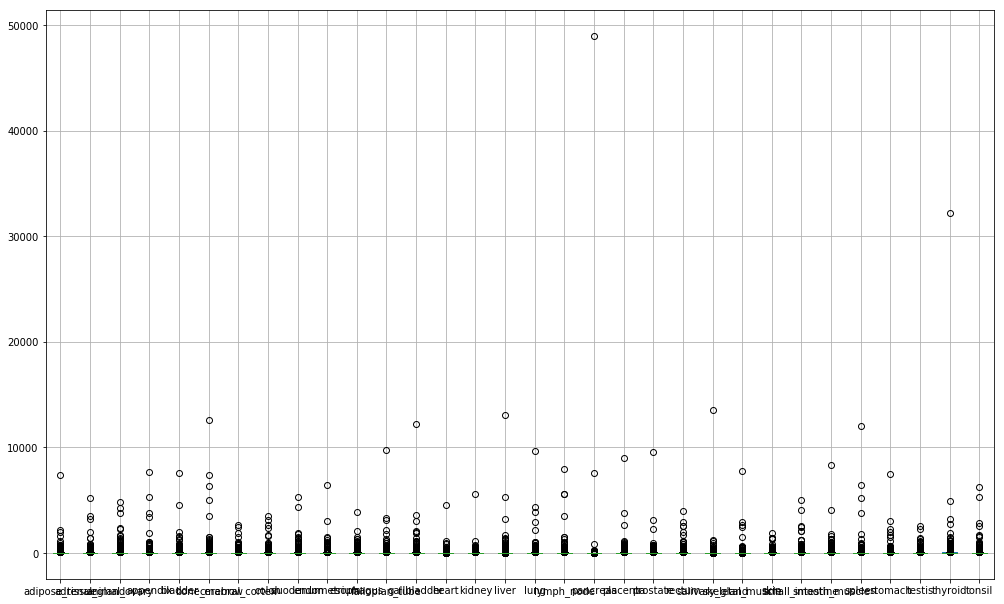

In [5]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

In [10]:
dataset.dtypes

adipose_tissue     float64
adrenal_gland      float64
animal_ovary       float64
appendix           float64
bladder            float64
bone_marrow        float64
cerebral_cortex    float64
colon              float64
duodenum           float64
endometrium        float64
esophagus          float64
fallopian_tube     float64
gallbladder        float64
heart              float64
kidney             float64
liver              float64
lung               float64
lymph_node         float64
pancreas           float64
placenta           float64
prostate           float64
rectum             float64
salivary_gland     float64
skeletal_muscle    float64
skin               float64
small_intestine    float64
smooth_muscle      float64
spleen             float64
stomach            float64
testis             float64
thyroid            float64
tonsil             float64
class               object
dtype: object

In [11]:
dataset.head(12)

,adipose_tissue,adrenal_gland,animal_ovary,appendix,bladder,bone_marrow,cerebral_cortex,colon,duodenum,endometrium,esophagus,fallopian_tube,gallbladder,heart,kidney,liver,lung,lymph_node,pancreas,placenta,prostate,rectum,salivary_gland,skeletal_muscle,skin,small_intestine,smooth_muscle,spleen,stomach,testis,thyroid,tonsil,class
0,31.730678,27.947800,109.900798,10.676703,88.592974,0.628672,15.263091,70.636083,30.415583,59.427387,63.119487,138.197180,57.034301,4.483002,39.874513,64.355217,27.344090,7.503825,8.034154,37.154553,50.053715,71.166864,61.691701,1.281708,9.914097,23.935905,21.242137,18.392589,23.496108,66.480961,59.541743,15.873599,b'ENSG00000000003'
1,22.211475,0.621062,7.850057,2.491231,0.708744,0.000003,0.000004,1.535567,0.276505,0.848963,0.701328,0.394849,0.814776,0.896600,0.498431,0.000003,0.000004,0.000004,0.200854,4.128284,3.575265,1.237685,0.536450,0.000002,0.330470,0.299199,1.699371,0.735704,0.000003,0.349900,0.458013,0.317472,b'ENSG00000000005'
2,79.326695,124.212446,102.050741,103.208129,116.942725,88.014135,61.052363,85.991753,66.361272,131.589213,101.692506,98.712272,114.068602,53.796024,49.843141,46.803795,85.938567,142.572683,20.085386,123.848509,103.682695,86.637921,40.233718,27.770329,72.703379,80.783681,101.962255,99.319983,67.551311,129.462925,160.304693,117.464636,b'ENSG00000000419'
3,6.346136,9.315933,15.700114,14.235604,14.174876,3.143362,7.631545,12.284536,8.295159,16.979253,10.519914,15.793963,16.295515,2.241501,7.476471,5.850474,11.718896,18.759564,1.807685,12.384851,14.301061,12.376846,5.364496,2.136179,13.218796,8.975965,12.745282,14.714072,11.748054,13.995992,18.320536,12.698880,b'ENSG00000000457'
4,2.221147,2.794780,3.925029,7.117802,3.543719,6.286724,2.289464,3.071134,2.765053,8.489627,3.506638,3.553642,4.073879,0.672450,1.246079,1.755142,3.515669,7.503825,0.401708,8.256567,3.575265,6.188423,1.072899,0.213618,3.304699,2.991988,4.248427,3.678518,2.349611,17.494990,3.664107,9.524160,b'ENSG00000000460'
5,15.865339,9.315933,3.140023,174.386149,31.893471,317.479557,7.631545,6.142268,5.530106,12.734440,14.026553,11.845473,36.664908,1.793201,2.492157,5.850474,82.032269,67.534429,2.008539,20.641418,7.150531,6.188423,2.682248,0.640854,6.609398,8.975965,21.242137,183.925894,5.874027,3.498998,9.160268,38.096639,b'ENSG00000000938'
6,79.326695,59.000912,184.476340,60.501317,166.554791,1.257345,15.263091,64.493815,30.415583,25.468880,91.172592,23.690945,236.284962,42.588519,17.445099,763.486898,66.407075,37.519127,2.008539,24.769702,21.451592,102.108978,21.457983,2.136179,42.961087,56.847775,38.235846,18.392589,64.614297,20.993988,41.221207,22.223039,b'ENSG00000000971'
7,57.115220,77.632779,82.425599,71.178020,92.136693,37.720343,26.710409,89.062887,74.656431,97.630707,28.053105,75.021327,93.699209,26.898012,69.780398,38.028083,74.219672,37.519127,14.059770,132.105076,60.779511,117.580036,18.775735,2.136179,19.828194,80.783681,84.968546,66.213322,76.362351,34.989980,100.762950,41.271359,b'ENSG00000001036'
8,25.384542,18.631867,11.775086,21.353406,49.612065,25.146896,38.157727,24.569072,35.945689,29.713693,42.079658,102.660763,40.738786,6.724503,22.429413,78.981403,11.718896,26.263389,2.008539,12.384851,28.602123,27.847903,8.046744,2.136179,23.132893,29.919882,21.242137,51.499250,29.370135,13.995992,50.381475,25.397759,b'ENSG00000001084'
9,22.211475,21.737178,62.800456,42.706812,38.980908,47.150429,30.526181,27.640206,19.355371,63.672200,24.546467,39.484909,44.812665,8.966004,14.952942,11.700949,39.062985,60.030603,4.017077,37.154553,39.327919,34.036326,10.728991,4.272358,26.437592,23.935905,42.484273,40.463697,26.433122,122.464929,68.702011,50.795518,b'ENSG00000001167'


In [8]:
dataset.columns

Index(['adipose_tissue', 'adrenal_gland', 'animal_ovary', 'appendix',
       'bladder', 'bone_marrow', 'cerebral_cortex', 'colon', 'duodenum',
       'endometrium', 'esophagus', 'fallopian_tube', 'gallbladder', 'heart',
       'kidney', 'liver', 'lung', 'lymph_node', 'pancreas', 'placenta',
       'prostate', 'rectum', 'salivary_gland', 'skeletal_muscle', 'skin',
       'small_intestine', 'smooth_muscle', 'spleen', 'stomach', 'testis',
       'thyroid', 'tonsil', 'class'],
      dtype='object')

In [9]:
for i in dataset.columns:
    aux = np.array(dataset[i])
    dataset[i] = dataset[i].replace(np.max(aux), np.nanmedian(aux))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''